In [1]:
# What happens when???

"""

The natural tendency of option premium is to depreciate at the open on the following day due to time decay - 'theta'
which is one of the option greeks. The rare occurence will be appreciation of the option premium. The idea is to Deploy
Short Strangle when the option premium apprecites.

"""

# Problem Statement: What happens to the Short Strangle when it is deployed on the basis of appreciated option premium???

"\n\nThe natural tendency of option premium is to depreciate at the open on the following day due to time decay - 'theta'\nwhich is one of the option greeks. The rare occurence will be appreciation of the option premium. The idea is to Deploy\nShort Strangle when the option premium apprecites.\n\n"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [3]:
df = pd.read_excel('../Documents/BN2020-22.xlsx')
df.head()

,DATE,CE,CE OPEN,CE CLOSE,CE PREMIUM AT OPEN,PE,PE OPEN,PE CLOSE,PE PREMIUM AT OPEN,TOTAL PREMIUM,PREMIUM DEPRECIATION,Y,SELL TOTAL,COVER TOTAL,NET
0,"Friday, 3 January, 2020",32300,249.95,135.20,223.00,32400,200.00,415.15,126.95,349.95,NaN,SHORT,449.95,550.35,-100.40
1,"Monday, 6 January, 2020",31900,240.15,45.20,229.70,32000,238.85,750.65,149.30,379.00,-8.301186,SHORT,479.00,795.85,-316.85
2,"Tuesday, 7 January, 2020",31500,225.15,145.10,127.10,31600,248.80,304.85,246.85,373.95,1.332454,NEUTRAL,473.95,449.95,24.00
3,"Wednesday, 8 January, 2020",30900,338.00,529.75,242.50,31000,197.75,85.85,193.25,435.75,-16.526274,LONG,535.75,615.60,-79.85
4,"Thursday, 9 January, 2020",31700,152.30,402.65,104.05,31800,204.85,0.30,153.10,257.15,40.986804,LONG,357.15,402.95,-45.80


In [4]:
df.columns = df.columns.str.replace(' ', '')

In [5]:
df.DATE = df.DATE.astype('datetime64')

In [6]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['DAY'] = df['DATE'].dt.day_name()
df['MONTH'] = df['DATE'].dt.month
df['YEAR'] = df['DATE'].dt.year
df['pct_return'] = ((df.NET*25)/250000)*100

In [7]:
df.head()

,DATE,CE,CEOPEN,CECLOSE,CEPREMIUMATOPEN,PE,PEOPEN,PECLOSE,PEPREMIUMATOPEN,TOTALPREMIUM,PREMIUMDEPRECIATION,Y,SELLTOTAL,COVERTOTAL,NET,DAY,MONTH,YEAR,pct_return
0,2020-01-03,32300,249.95,135.20,223.00,32400,200.00,415.15,126.95,349.95,NaN,SHORT,449.95,550.35,-100.40,Friday,1,2020,-1.0040
1,2020-01-06,31900,240.15,45.20,229.70,32000,238.85,750.65,149.30,379.00,-8.301186,SHORT,479.00,795.85,-316.85,Monday,1,2020,-3.1685
2,2020-01-07,31500,225.15,145.10,127.10,31600,248.80,304.85,246.85,373.95,1.332454,NEUTRAL,473.95,449.95,24.00,Tuesday,1,2020,0.2400
3,2020-01-08,30900,338.00,529.75,242.50,31000,197.75,85.85,193.25,435.75,-16.526274,LONG,535.75,615.60,-79.85,Wednesday,1,2020,-0.7985
4,2020-01-09,31700,152.30,402.65,104.05,31800,204.85,0.30,153.10,257.15,40.986804,LONG,357.15,402.95,-45.80,Thursday,1,2020,-0.4580


In [8]:
#df.PREMIUMDEPRECIATION = df.PREMIUMDEPRECIATION.fillna(0)

In [9]:
#df.head(1)

In [10]:
df = df.dropna()

In [11]:
df.head()

,DATE,CE,CEOPEN,CECLOSE,CEPREMIUMATOPEN,PE,PEOPEN,PECLOSE,PEPREMIUMATOPEN,TOTALPREMIUM,PREMIUMDEPRECIATION,Y,SELLTOTAL,COVERTOTAL,NET,DAY,MONTH,YEAR,pct_return
1,2020-01-06,31900,240.15,45.20,229.70,32000,238.85,750.65,149.30,379.00,-8.301186,SHORT,479.00,795.85,-316.85,Monday,1,2020,-3.1685
2,2020-01-07,31500,225.15,145.10,127.10,31600,248.80,304.85,246.85,373.95,1.332454,NEUTRAL,473.95,449.95,24.00,Tuesday,1,2020,0.2400
3,2020-01-08,30900,338.00,529.75,242.50,31000,197.75,85.85,193.25,435.75,-16.526274,LONG,535.75,615.60,-79.85,Wednesday,1,2020,-0.7985
4,2020-01-09,31700,152.30,402.65,104.05,31800,204.85,0.30,153.10,257.15,40.986804,LONG,357.15,402.95,-45.80,Thursday,1,2020,-0.4580
6,2020-01-13,32100,285.25,295.70,246.15,32200,290.75,241.10,229.85,476.00,16.027168,NEUTRAL,576.00,536.80,39.20,Monday,1,2020,0.3920


In [12]:
df = df[df.DAY != 'Saturday']

In [13]:
df.DAY.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday'], dtype=object)

In [14]:
df.shape

(510, 19)

# Average Premium Depreciation Day-Wise

In [15]:
avg_pre_dep = df.groupby(['DAY'])['PREMIUMDEPRECIATION'].mean()

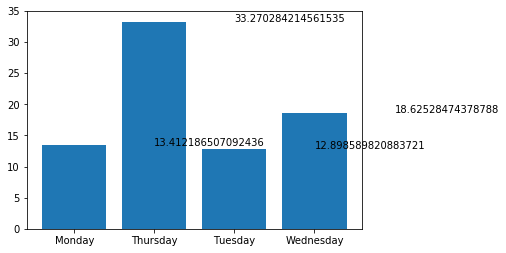

In [16]:
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i,y_list[i-1],y_list[i-1])
plt.bar(avg_pre_dep.index, avg_pre_dep.values)
add_value_label(avg_pre_dep.index,avg_pre_dep.values)
plt.show()

# Average Net Points Day-Wise

In [17]:
avg_net_pts = df.groupby(['DAY'])['NET'].mean()

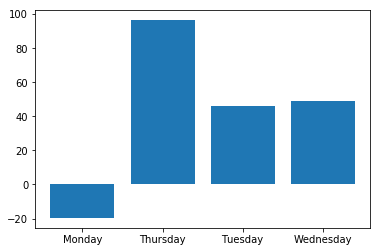

In [18]:
plt.bar(avg_net_pts.index, avg_net_pts.values)
plt.show()

# Average Sell Total Day - Wise

In [19]:
avg_sell_tot = df.groupby(['DAY'])['SELLTOTAL'].mean()

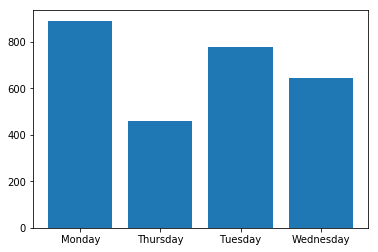

In [20]:
plt.bar(avg_sell_tot.index, avg_sell_tot.values)
plt.show()

# Most no. of Positive Trades Day-Wise

In [21]:
df_pos = df[df.NET > 0]

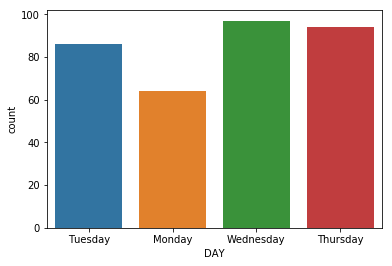

In [22]:
sb.countplot(df_pos.DAY)
plt.show()

In [23]:
a = df_pos.DAY.value_counts()
a.values.sum()

341

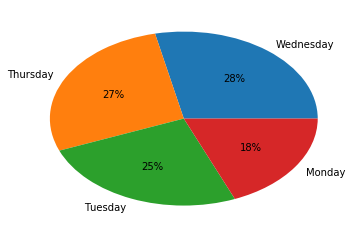

In [24]:
plt.pie(a.values, labels=a.index, autopct='%d%%')
plt.show()

In [25]:
pre_dep = df[df.PREMIUMDEPRECIATION > 0]
pre_app = df[df.PREMIUMDEPRECIATION < 0]

In [26]:
pre_dep.NET.mean()

23.505656108597282

In [27]:
pre_app.NET.mean()

178.59485294117658

In [28]:
pre_dep.shape

(442, 19)

In [29]:
442/510*100

86.66666666666667

In [30]:
pre_app.shape

(68, 19)

In [31]:
68/510*100

13.333333333333334

In [32]:
pre_dep.NET.sum()

10389.500000000002

In [33]:
pre_app.NET.sum()

12144.45

In [34]:
pre_dep_pos = pre_dep[pre_dep.NET > 0]
pre_dep_pos.shape

(286, 19)

In [35]:
286/442*100

64.70588235294117

In [36]:
pre_app_pos = pre_app[pre_app.NET > 0]
pre_app_pos.shape

(55, 19)

In [37]:
55/68*100

80.88235294117648

In [38]:
pre_dep_pos.NET.sum()

38034.75

In [39]:
pre_app_pos.NET.sum()

14799.200000000003

# INSIGHTS

In [40]:
"""
TF - Trade Frequency
PPT - Points Per Trade
"""

'\nTF - Trade Frequency\nPPT - Points Per Trade\n'

In [41]:
# a) Averagely, on a thursday, the Premium Depreciates the most.
# b) If a Short Strangle is deployed, max gain will be on a thursday and one must not deploy this strategy on a Monday 
#    as Net Gain is Negative.
# c) Averagely, when the option premium depreciates on the following day (TF: 86.66%), the average PPT is 23.5 whereas 
#    when the option premium appreciates on the following day (TF: 13.33%), the average PPT is 178.6
# d) With only 13.33% TF, the NET Sum of such trades is comparatively greater i.e. 12144 option points against 10389 points.
# e) There are more profitable Trades when the option premium appreciates on the following day i.e. 80.88% against 64.7%.